<a href="https://colab.research.google.com/github/usshaa/HiveTech/blob/main/EV_Module_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Electric Vehicle Data Analytics
"""
Learning Objectives:
1. Understand the importance of data analytics in electric vehicles
2. Learn about different types of EV data and their sources
3. Generate and explore a simulated EV dataset
4. Understand key performance indicators (KPIs) for EVs
5. Introduction to basic data analysis concepts for automotive data
"""

'\nLearning Objectives:\n1. Understand the importance of data analytics in electric vehicles\n2. Learn about different types of EV data and their sources\n3. Generate and explore a simulated EV dataset\n4. Understand key performance indicators (KPIs) for EVs\n5. Introduction to basic data analysis concepts for automotive data\n'

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Set plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

In [4]:
# ============================================================================
# SECTION 1: INTRODUCTION TO EV DATA ANALYTICS
# ============================================================================

"""
Electric Vehicle Data Analytics involves:

🔋 Battery Management: Monitoring battery health, charging patterns, degradation
🚗 Vehicle Performance: Speed, acceleration, energy efficiency analysis
🌡️ Thermal Management: Temperature monitoring across vehicle systems
⚡ Energy Optimization: Consumption patterns, charging optimization
🔧 Predictive Maintenance: Predicting component failures before they occur
📊 Fleet Management: Managing multiple vehicles, route optimization

Key Benefits:
✅ Improved battery life and performance
✅ Reduced operational costs
✅ Enhanced vehicle safety and reliability
✅ Better user experience and range prediction
✅ Optimized charging infrastructure planning
"""

# ============================================================================
# SECTION 2: TYPES OF EV DATA
# ============================================================================

ev_data_types = {
    "Battery Data": [
        "State of Charge (SoC) %",
        "Battery Voltage (V)",
        "Battery Temperature (°C)",
        "Charging Power (kW)",
        "Discharge Rate (A)",
        "Cell Voltages",
        "Battery Health Index"
    ],
    "Motor & Drivetrain": [
        "Motor RPM",
        "Motor Temperature (°C)",
        "Motor Torque (Nm)",
        "Motor Efficiency (%)",
        "Inverter Temperature",
        "Gear Ratio",
        "Regenerative Braking Power"
    ],
    "Vehicle Dynamics": [
        "Speed (km/h)",
        "Acceleration (m/s²)",
        "GPS Coordinates",
        "Distance Traveled (km)",
        "Steering Angle",
        "Brake Pressure",
        "Tire Pressure"
    ],
    "Environmental": [
        "Ambient Temperature (°C)",
        "Humidity (%)",
        "Air Pressure",
        "Road Grade (%)",
        "Weather Conditions",
        "Traffic Conditions"
    ],
    "Usage Patterns": [
        "Trip Duration",
        "Charging Sessions",
        "Driving Modes (Eco/Normal/Sport)",
        "HVAC Usage",
        "Auxiliary Power Consumption"
    ]
}

In [5]:
for category, features in ev_data_types.items():
    print(f"\n{category}:")
    for feature in features:
        print(f"  • {feature}")


Battery Data:
  • State of Charge (SoC) %
  • Battery Voltage (V)
  • Battery Temperature (°C)
  • Charging Power (kW)
  • Discharge Rate (A)
  • Cell Voltages
  • Battery Health Index

Motor & Drivetrain:
  • Motor RPM
  • Motor Temperature (°C)
  • Motor Torque (Nm)
  • Motor Efficiency (%)
  • Inverter Temperature
  • Gear Ratio
  • Regenerative Braking Power

Vehicle Dynamics:
  • Speed (km/h)
  • Acceleration (m/s²)
  • GPS Coordinates
  • Distance Traveled (km)
  • Steering Angle
  • Brake Pressure
  • Tire Pressure

Environmental:
  • Ambient Temperature (°C)
  • Humidity (%)
  • Air Pressure
  • Road Grade (%)
  • Weather Conditions
  • Traffic Conditions

Usage Patterns:
  • Trip Duration
  • Charging Sessions
  • Driving Modes (Eco/Normal/Sport)
  • HVAC Usage
  • Auxiliary Power Consumption


In [6]:
# ============================================================================
# SECTION 3: SIMULATED EV DATASET GENERATION
# ============================================================================

In [7]:
def generate_ev_dataset(num_records=10000, random_seed=42):
    """
    Generate a comprehensive simulated EV dataset for educational purposes

    Parameters:
    - num_records: Number of data points to generate
    - random_seed: Random seed for reproducibility

    Returns:
    - pandas DataFrame with simulated EV data
    """

    np.random.seed(random_seed)

    print(f"Generating {num_records} records of simulated EV data...")

    # Time series data (1 minute intervals)
    start_time = datetime(2024, 1, 1, 0, 0, 0)
    timestamps = [start_time + timedelta(minutes=i) for i in range(num_records)]

    # Initialize arrays
    data = {
        'timestamp': timestamps,
        'vehicle_id': np.random.choice(['EV_001', 'EV_002', 'EV_003', 'EV_004', 'EV_005'], num_records),
    }

    # Generate realistic driving patterns
    time_of_day = [(ts.hour + ts.minute/60) for ts in timestamps]

    # Speed profile (realistic driving patterns)
    base_speed = []
    for hour in time_of_day:
        if 6 <= hour <= 9 or 17 <= hour <= 19:  # Rush hours
            base_speed.append(np.random.normal(30, 15))  # Slower in traffic
        elif 22 <= hour or hour <= 6:  # Night
            base_speed.append(np.random.normal(60, 20))  # Faster at night
        else:  # Regular hours
            base_speed.append(np.random.normal(50, 20))  # Normal speed

    data['speed_kmh'] = np.maximum(0, base_speed)  # No negative speeds

    # Battery State of Charge (SoC) - realistic degradation
    initial_soc = 85
    soc_values = []
    current_soc = initial_soc

    for i, speed in enumerate(data['speed_kmh']):
        # Energy consumption based on speed (higher speed = more consumption)
        consumption_rate = 0.15 + (speed / 100) * 0.1  # kWh per minute
        energy_used = consumption_rate * (1 + np.random.normal(0, 0.1))

        # Charging events (random charging sessions)
        if current_soc < 20 or (current_soc < 80 and np.random.random() < 0.001):
            charging_power = np.random.uniform(7, 50)  # kW
            current_soc = min(100, current_soc + (charging_power / 75) * 100)  # 75kWh battery
        else:
            current_soc = max(0, current_soc - (energy_used / 75) * 100)

        soc_values.append(current_soc)

    data['battery_soc_percent'] = soc_values

    # Battery voltage (correlated with SoC)
    data['battery_voltage_v'] = 300 + (np.array(data['battery_soc_percent']) / 100) * 100 + np.random.normal(0, 5, num_records)

    # Battery temperature (affected by usage and ambient temperature)
    ambient_temp = 20 + 10 * np.sin(2 * np.pi * np.array(time_of_day) / 24) + np.random.normal(0, 3, num_records)
    usage_heat = np.array(data['speed_kmh']) * 0.2
    data['battery_temp_c'] = ambient_temp + usage_heat + np.random.normal(0, 2, num_records)

    # Motor temperature (correlated with speed and usage)
    data['motor_temp_c'] = 40 + np.array(data['speed_kmh']) * 0.3 + np.random.normal(0, 5, num_records)

    # Motor RPM (correlated with speed)
    data['motor_rpm'] = np.array(data['speed_kmh']) * 50 + np.random.normal(0, 200, num_records)

    # Energy consumption (kWh per 100km)
    base_consumption = 15  # kWh/100km
    speed_factor = (np.array(data['speed_kmh']) / 50) ** 1.5  # Higher speeds = more consumption
    temp_factor = np.where(np.array(data['battery_temp_c']) < 0, 1.3, 1.0)  # Cold weather effect
    data['energy_consumption_kwh_100km'] = base_consumption * speed_factor * temp_factor + np.random.normal(0, 2, num_records)

    # Charging power (0 when not charging)
    charging_events = np.random.random(num_records) < 0.05  # 5% chance of charging
    data['charging_power_kw'] = np.where(charging_events, np.random.uniform(0, 50, num_records), 0)

    # Motor efficiency (%)
    data['motor_efficiency_percent'] = 90 + np.random.normal(0, 5, num_records)
    data['motor_efficiency_percent'] = np.clip(data['motor_efficiency_percent'], 70, 98)

    # Ambient conditions
    data['ambient_temp_c'] = ambient_temp
    data['humidity_percent'] = 50 + np.random.normal(0, 20, num_records)
    data['humidity_percent'] = np.clip(data['humidity_percent'], 0, 100)

    # Distance traveled (cumulative)
    distance_increments = np.array(data['speed_kmh']) / 60  # km per minute
    data['distance_km'] = np.cumsum(distance_increments)

    # Driving mode
    data['driving_mode'] = np.random.choice(['Eco', 'Normal', 'Sport'], num_records, p=[0.3, 0.5, 0.2])

    # Vehicle health indicators
    total_distance = np.array(data['distance_km'])
    data['brake_wear_percent'] = np.minimum(100, (total_distance / 80000) * 100)  # 80k km brake life
    data['tire_wear_percent'] = np.minimum(100, (total_distance / 60000) * 100)   # 60k km tire life

    # Create DataFrame
    df = pd.DataFrame(data)

    print(f"✅ Dataset generated successfully!")
    print(f"   • Records: {len(df):,}")
    print(f"   • Features: {len(df.columns)}")
    print(f"   • Time Range: {df['timestamp'].min()} to {df['timestamp'].max()}")

    return df

In [8]:
# Generate the dataset
ev_data = generate_ev_dataset(num_records=5000)

Generating 5000 records of simulated EV data...
✅ Dataset generated successfully!
   • Records: 5,000
   • Features: 17
   • Time Range: 2024-01-01 00:00:00 to 2024-01-04 11:19:00


In [9]:
# Display basic information about the dataset
print(f"Shape: {ev_data.shape}")
print(f"Memory Usage: {ev_data.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

Shape: (5000, 17)
Memory Usage: 1.17 MB


In [10]:
# ============================================================================
# SECTION 4: DATASET EXPLORATION
# ============================================================================

In [11]:
# Display first few rows
print("First 5 rows of the dataset:")
print(ev_data.head())

First 5 rows of the dataset:
            timestamp vehicle_id  speed_kmh  battery_soc_percent  \
0 2024-01-01 00:00:00     EV_004   1.860236            84.807733   
1 2024-01-01 00:01:00     EV_005  52.503559            84.578766   
2 2024-01-01 00:02:00     EV_003  39.229124            84.303091   
3 2024-01-01 00:03:00     EV_005  27.374484            84.075720   
4 2024-01-01 00:04:00     EV_005  35.251467            83.824221   

   battery_voltage_v  battery_temp_c  motor_temp_c    motor_rpm  \
0         391.606593       25.399108     37.176341    86.417997   
1         384.355223       30.707754     48.910828  2531.061402   
2         379.872528       31.039032     52.715242  2172.715881   
3         375.977271       23.812654     41.595623  1250.268045   
4         386.389460       25.769085     40.670204  1846.885942   

   energy_consumption_kwh_100km  charging_power_kw  motor_efficiency_percent  \
0                     -0.385358                0.0                 87.252085   

In [12]:
print("\n\nDataset Info:")
print(ev_data.info())



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   timestamp                     5000 non-null   datetime64[ns]
 1   vehicle_id                    5000 non-null   object        
 2   speed_kmh                     5000 non-null   float64       
 3   battery_soc_percent           5000 non-null   float64       
 4   battery_voltage_v             5000 non-null   float64       
 5   battery_temp_c                5000 non-null   float64       
 6   motor_temp_c                  5000 non-null   float64       
 7   motor_rpm                     5000 non-null   float64       
 8   energy_consumption_kwh_100km  5000 non-null   float64       
 9   charging_power_kw             5000 non-null   float64       
 10  motor_efficiency_percent      5000 non-null   float64       
 11  ambient_temp_c

In [13]:
print("\n\nBasic Statistics:")
print(ev_data.describe())



Basic Statistics:
                 timestamp    speed_kmh  battery_soc_percent  \
count                 5000  5000.000000          5000.000000   
mean   2024-01-02 17:39:30    48.804647            44.691718   
min    2024-01-01 00:00:00     0.000000            19.682349   
25%    2024-01-01 20:49:45    33.006727            30.735650   
50%    2024-01-02 17:39:30    48.254494            42.055001   
75%    2024-01-03 14:29:15    64.064278            55.574721   
max    2024-01-04 11:19:00   121.537207           100.000000   
std                    NaN    22.205536            17.179713   

       battery_voltage_v  battery_temp_c  motor_temp_c    motor_rpm  \
count        5000.000000     5000.000000   5000.000000  5000.000000   
mean          344.752408       30.616292     54.544005  2442.963822   
min           306.638307        2.584548     29.399140  -445.529225   
25%           330.515461       24.092172     48.866979  1632.174140   
50%           342.369189       31.429686     54.

In [14]:
# Check for missing values
print(f"\n\nMissing Values:")
missing_values = ev_data.isnull().sum()
print(missing_values[missing_values > 0])



Missing Values:
Series([], dtype: int64)


In [15]:
# ============================================================================
# SECTION 5: KEY PERFORMANCE INDICATORS (KPIs) FOR EVs
# ============================================================================

In [16]:
# Calculate important KPIs
kpis = {}

In [17]:
# Battery KPIs
kpis['Average Battery SoC'] = f"{ev_data['battery_soc_percent'].mean():.1f}%"
kpis['Min Battery SoC'] = f"{ev_data['battery_soc_percent'].min():.1f}%"
kpis['Battery SoC Std Dev'] = f"{ev_data['battery_soc_percent'].std():.1f}%"

In [18]:
# Performance KPIs
kpis['Average Speed'] = f"{ev_data['speed_kmh'].mean():.1f} km/h"
kpis['Max Speed'] = f"{ev_data['speed_kmh'].max():.1f} km/h"
kpis['Total Distance'] = f"{ev_data['distance_km'].max():.1f} km"

In [19]:
# Energy KPIs
kpis['Avg Energy Consumption'] = f"{ev_data['energy_consumption_kwh_100km'].mean():.1f} kWh/100km"
kpis['Motor Efficiency'] = f"{ev_data['motor_efficiency_percent'].mean():.1f}%"

In [20]:
# Temperature KPIs
kpis['Avg Battery Temperature'] = f"{ev_data['battery_temp_c'].mean():.1f}°C"
kpis['Max Battery Temperature'] = f"{ev_data['battery_temp_c'].max():.1f}°C"
kpis['Avg Motor Temperature'] = f"{ev_data['motor_temp_c'].mean():.1f}°C"

In [21]:
# Maintenance KPIs
kpis['Max Brake Wear'] = f"{ev_data['brake_wear_percent'].max():.1f}%"
kpis['Max Tire Wear'] = f"{ev_data['tire_wear_percent'].max():.1f}%"

In [22]:
for kpi, value in kpis.items():
    print(f"{kpi:.<25} {value}")

Average Battery SoC...... 44.7%
Min Battery SoC.......... 19.7%
Battery SoC Std Dev...... 17.2%
Average Speed............ 48.8 km/h
Max Speed................ 121.5 km/h
Total Distance........... 4067.1 km
Avg Energy Consumption... 15.6 kWh/100km
Motor Efficiency......... 89.8%
Avg Battery Temperature.. 30.6°C
Max Battery Temperature.. 59.7°C
Avg Motor Temperature.... 54.5°C
Max Brake Wear........... 5.1%
Max Tire Wear............ 6.8%


In [23]:
# ============================================================================
# SECTION 6: BASIC VISUALIZATIONS
# ============================================================================

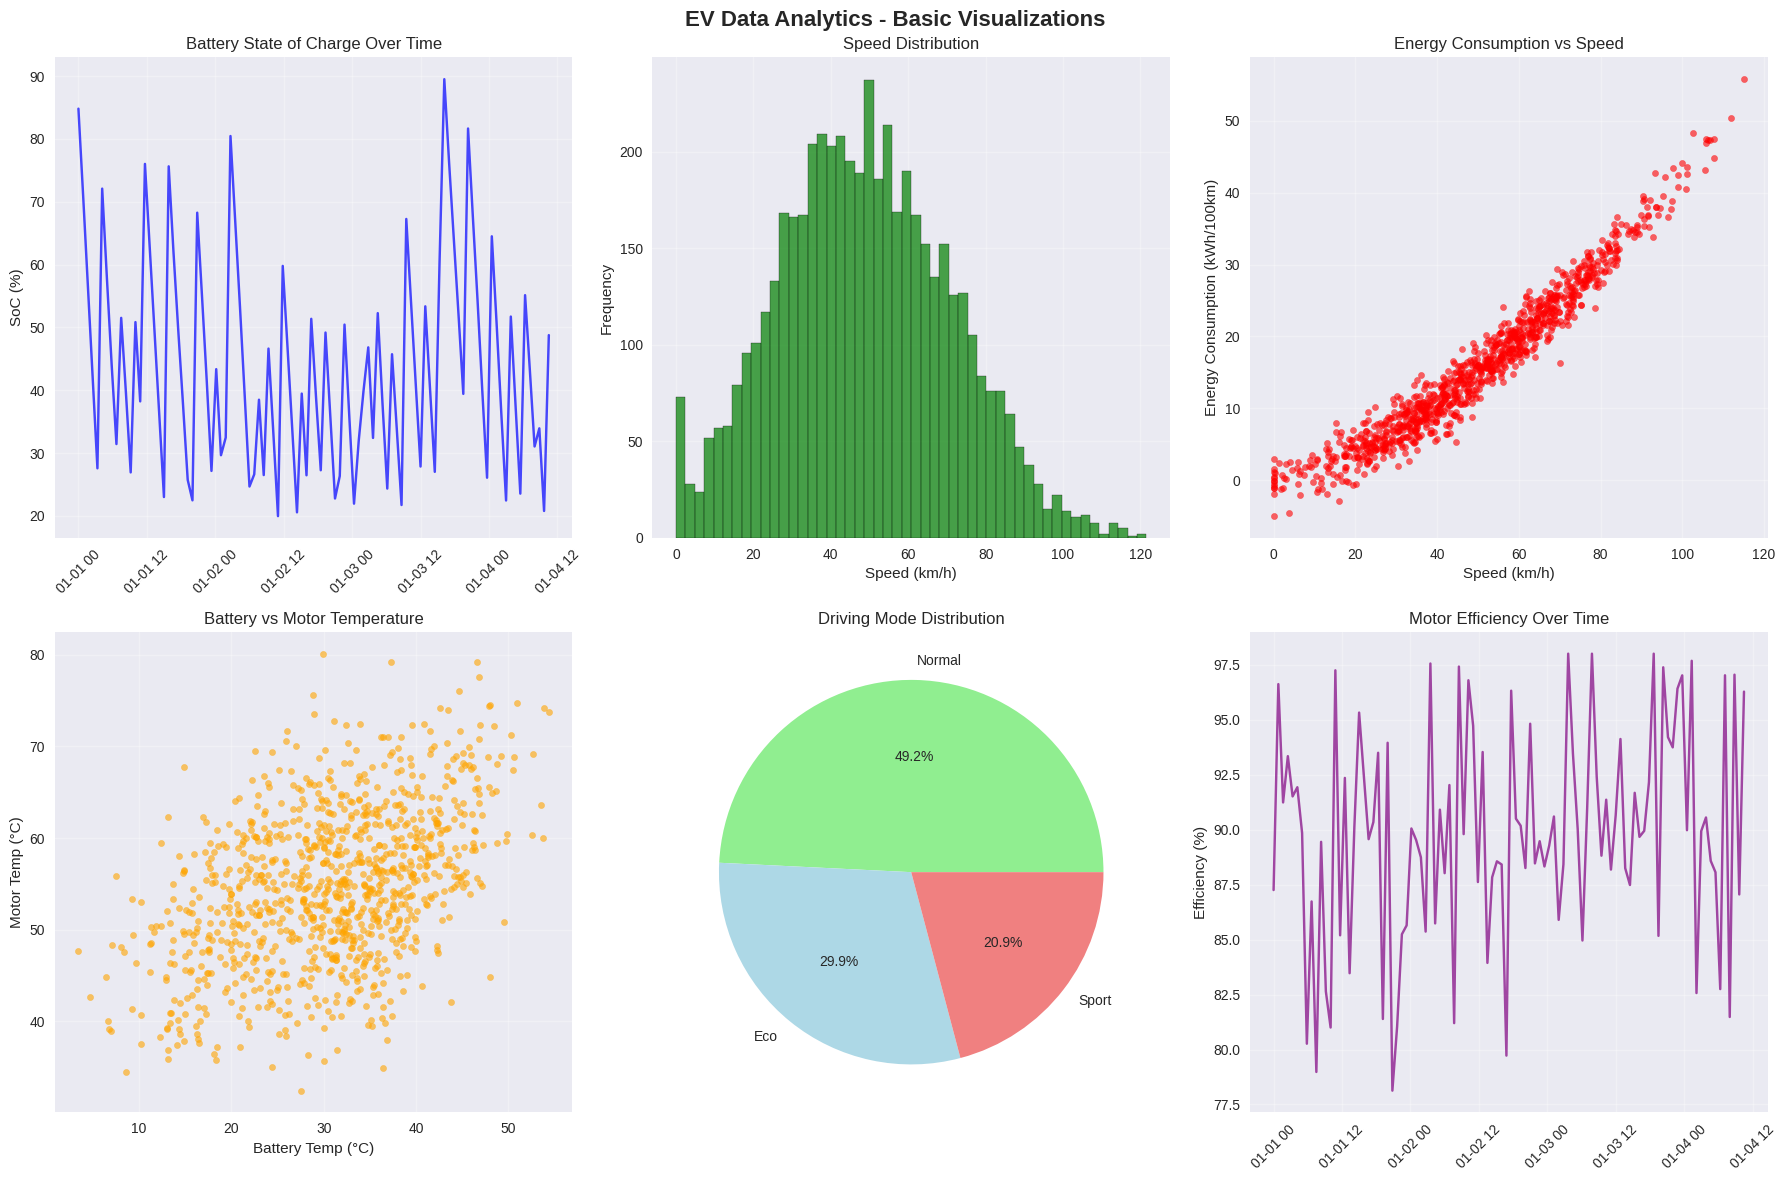

In [24]:
# Create visualizations
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('EV Data Analytics - Basic Visualizations', fontsize=16, fontweight='bold')

# 1. Battery SoC over time
axes[0, 0].plot(ev_data['timestamp'][::50], ev_data['battery_soc_percent'][::50], alpha=0.7, color='blue')
axes[0, 0].set_title('Battery State of Charge Over Time')
axes[0, 0].set_ylabel('SoC (%)')
axes[0, 0].tick_params(axis='x', rotation=45)
axes[0, 0].grid(True, alpha=0.3)

# 2. Speed distribution
axes[0, 1].hist(ev_data['speed_kmh'], bins=50, alpha=0.7, color='green', edgecolor='black')
axes[0, 1].set_title('Speed Distribution')
axes[0, 1].set_xlabel('Speed (km/h)')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].grid(True, alpha=0.3)

# 3. Energy consumption vs Speed
sample_data = ev_data.sample(1000)  # Sample for better visualization
axes[0, 2].scatter(sample_data['speed_kmh'], sample_data['energy_consumption_kwh_100km'],
                  alpha=0.6, color='red', s=20)
axes[0, 2].set_title('Energy Consumption vs Speed')
axes[0, 2].set_xlabel('Speed (km/h)')
axes[0, 2].set_ylabel('Energy Consumption (kWh/100km)')
axes[0, 2].grid(True, alpha=0.3)

# 4. Battery temperature vs Motor temperature
axes[1, 0].scatter(sample_data['battery_temp_c'], sample_data['motor_temp_c'],
                  alpha=0.6, color='orange', s=20)
axes[1, 0].set_title('Battery vs Motor Temperature')
axes[1, 0].set_xlabel('Battery Temp (°C)')
axes[1, 0].set_ylabel('Motor Temp (°C)')
axes[1, 0].grid(True, alpha=0.3)

# 5. Driving mode distribution
mode_counts = ev_data['driving_mode'].value_counts()
axes[1, 1].pie(mode_counts.values, labels=mode_counts.index, autopct='%1.1f%%',
              colors=['lightgreen', 'lightblue', 'lightcoral'])
axes[1, 1].set_title('Driving Mode Distribution')

# 6. Motor efficiency over time
axes[1, 2].plot(ev_data['timestamp'][::50], ev_data['motor_efficiency_percent'][::50],
               alpha=0.7, color='purple')
axes[1, 2].set_title('Motor Efficiency Over Time')
axes[1, 2].set_ylabel('Efficiency (%)')
axes[1, 2].tick_params(axis='x', rotation=45)
axes[1, 2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [25]:
# ============================================================================
# SECTION 7: CORRELATION ANALYSIS
# ============================================================================

In [26]:
# Select numerical columns for correlation
numerical_cols = ['speed_kmh', 'battery_soc_percent', 'battery_voltage_v',
                 'battery_temp_c', 'motor_temp_c', 'motor_rpm',
                 'energy_consumption_kwh_100km', 'motor_efficiency_percent']

In [27]:
# Calculate correlation matrix
correlation_matrix = ev_data[numerical_cols].corr()

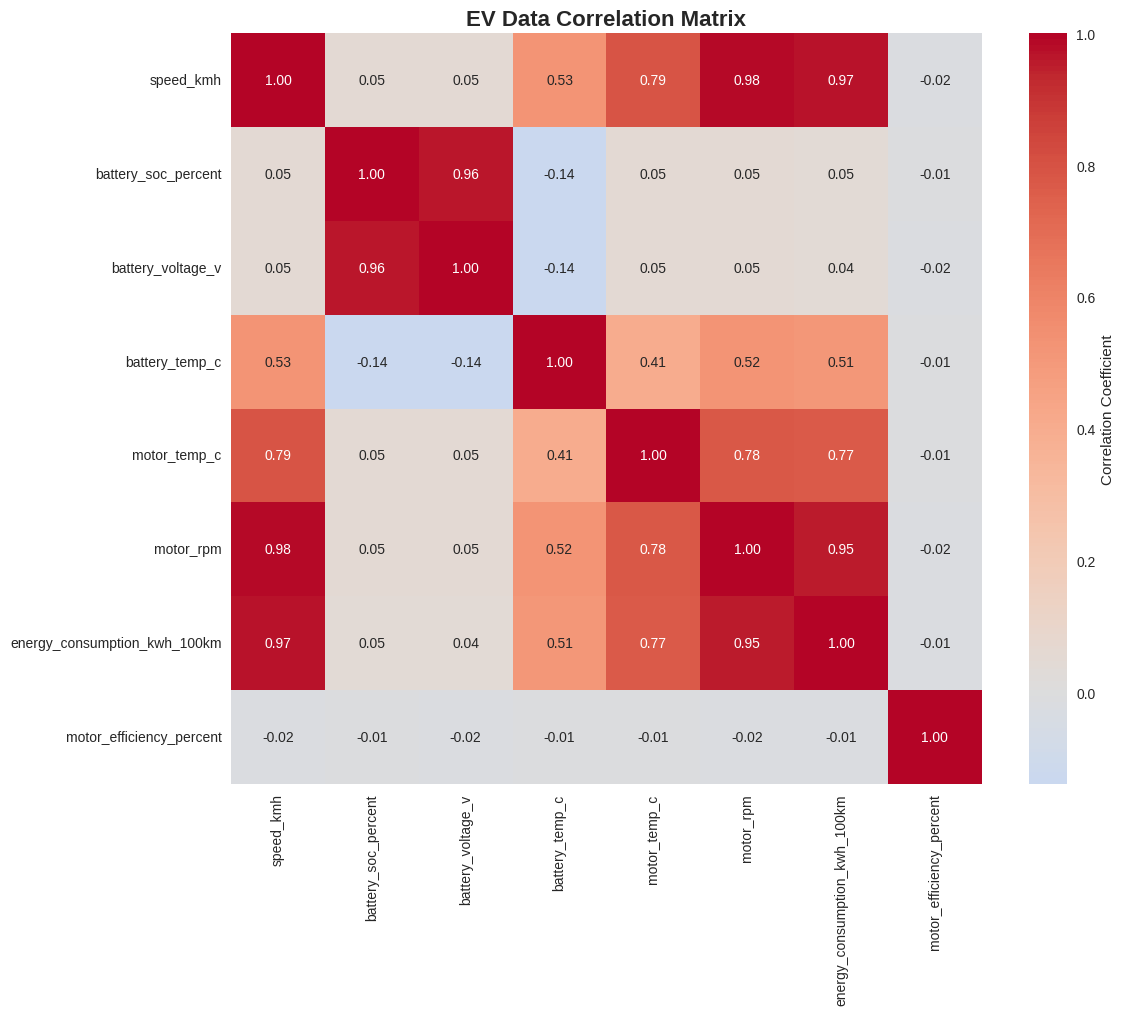

In [28]:
# Create correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, fmt='.2f', cbar_kws={'label': 'Correlation Coefficient'})
plt.title('EV Data Correlation Matrix', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

In [29]:
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr_value = correlation_matrix.iloc[i, j]
        if abs(corr_value) > 0.7:
            col1 = correlation_matrix.columns[i]
            col2 = correlation_matrix.columns[j]
            print(f"{col1} ↔ {col2}: {corr_value:.3f}")

speed_kmh ↔ motor_temp_c: 0.792
speed_kmh ↔ motor_rpm: 0.985
speed_kmh ↔ energy_consumption_kwh_100km: 0.969
battery_soc_percent ↔ battery_voltage_v: 0.960
motor_temp_c ↔ motor_rpm: 0.780
motor_temp_c ↔ energy_consumption_kwh_100km: 0.768
motor_rpm ↔ energy_consumption_kwh_100km: 0.954


In [30]:
# ============================================================================
# SECTION 8: DATA ANALYTICS APPLICATIONS IN EV
# ============================================================================

In [31]:
applications = {
    "Battery Management": [
        "🔋 State of Health (SoH) estimation",
        "🔋 Remaining useful life prediction",
        "🔋 Optimal charging strategies",
        "🔋 Thermal management optimization"
    ],
    "Performance Optimization": [
        "⚡ Energy consumption prediction",
        "⚡ Range estimation and anxiety reduction",
        "⚡ Motor efficiency optimization",
        "⚡ Regenerative braking optimization"
    ],
    "Predictive Maintenance": [
        "🔧 Component failure prediction",
        "🔧 Maintenance scheduling optimization",
        "🔧 Warranty claim prediction",
        "🔧 Parts inventory management"
    ],
    "Fleet Management": [
        "🚛 Route optimization",
        "🚛 Charging infrastructure planning",
        "🚛 Driver behavior analysis",
        "🚛 Total cost of ownership analysis"
    ],
    "User Experience": [
        "👤 Personalized driving recommendations",
        "👤 Charging station recommendations",
        "👤 Energy-efficient route planning",
        "👤 Driving pattern analysis"
    ]
}

In [32]:
for category, items in applications.items():
    print(f"\n{category}:")
    for item in items:
        print(f"  {item}")


Battery Management:
  🔋 State of Health (SoH) estimation
  🔋 Remaining useful life prediction
  🔋 Optimal charging strategies
  🔋 Thermal management optimization

Performance Optimization:
  ⚡ Energy consumption prediction
  ⚡ Range estimation and anxiety reduction
  ⚡ Motor efficiency optimization
  ⚡ Regenerative braking optimization

Predictive Maintenance:
  🔧 Component failure prediction
  🔧 Maintenance scheduling optimization
  🔧 Warranty claim prediction
  🔧 Parts inventory management

Fleet Management:
  🚛 Route optimization
  🚛 Charging infrastructure planning
  🚛 Driver behavior analysis
  🚛 Total cost of ownership analysis

User Experience:
  👤 Personalized driving recommendations
  👤 Charging station recommendations
  👤 Energy-efficient route planning
  👤 Driving pattern analysis


In [33]:
# ============================================================================
# SECTION 9: Save the dataset
# ============================================================================

# Save the dataset for next modules
print(f"\n💾 Saving dataset for next modules...")
ev_data.to_csv('ev_dataset.csv', index=False)
print(f"✅ Dataset saved as 'ev_dataset.csv' ({len(ev_data)} records)")


💾 Saving dataset for next modules...
✅ Dataset saved as 'ev_dataset.csv' (5000 records)
